In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('refined_drug_data.csv', sep=';')
# all NaN to empty string
df = df.fillna('')

data = df.copy()
# make an array
data['drug_names'] = data[['Drug_1', 'Drug_2', 'Drug_3', 'Drug_4', 'Drug_5', 'Drug_6', 'Drug_7', 'Drug_8']].values.tolist()
# remove empty strings
data['drug_names'] = data['drug_names'].apply(lambda x: [i for i in x if i])
data = data.drop(['Drug_1', 'Drug_2', 'Drug_3', 'Drug_4', 'Drug_5', 'Drug_6', 'Drug_7', 'Drug_8'], axis=1)
data

print('Total number of combinations:', len(data))
print('Number of unique drugs:', len(data['drug_names'].explode().unique()))

# sort by freq 
sorted_drug = data['drug_names'].explode().value_counts().index
print('Sorted medications by frequency:', sorted_drug)
print('Frequency of each medication:', data['drug_names'].explode().value_counts().to_list())

Total number of combinations: 912
Number of unique drugs: 40
Sorted medications by frequency: Index(['LISINOPRIL', 'SIMVASTATIN', 'METOPROLOL', 'METFORMIN', 'LEVOTHYROXINE',
       'AMLODIPINE', 'HYDROCHLOROTHIAZIDE', 'FUROSEMIDE', 'ATORVASTATIN',
       'OMEPRAZOLE', 'ATENOLOL', 'GLIPIZIDE', 'ALBUTEROL', 'WARFARIN',
       'ASPIRIN', 'POTASSIUM CHLORIDE', 'ESOMEPRAZOLE', 'CLOPIDOGREL',
       'CARVEDILOL', 'VALSARTAN', 'LOSARTAN', 'GABAPENTIN', 'ROSUVASTATIN',
       'LOVASTATIN', 'PIOGLITAZONE', 'PRAVASTATIN', 'RANITIDINE', 'TRAMADOL',
       'IBUPROFEN', 'INSULIN GLARGINE', 'CITALOPRAM', 'ALENDRONATE',
       'ALLOPURINOL', 'MONTELUKAST', 'FEXOFENADINE', 'TAMSULOSIN', 'ZOLPIDEM',
       'SERTRALINE', 'FLUTICASONE NASAL', 'PREDNISONE'],
      dtype='object')
Frequency of each medication: [294, 270, 223, 215, 170, 159, 157, 133, 133, 127, 123, 98, 82, 81, 75, 72, 65, 65, 63, 62, 55, 54, 54, 52, 50, 48, 48, 46, 43, 42, 42, 42, 39, 34, 33, 32, 32, 32, 29, 28]


In [3]:
data

,SEQN,drug_names
0,51628,"[CARVEDILOL, ESOMEPRAZOLE, LEVOTHYROXINE, TRAM..."
1,51635,"[AMLODIPINE, METOPROLOL, OMEPRAZOLE, SIMVASTAT..."
2,51675,"[ALENDRONATE, ATORVASTATIN, LEVOTHYROXINE, LIS..."
3,51687,"[AMLODIPINE, LOSARTAN, SIMVASTATIN]"
4,51702,"[LISINOPRIL, METOPROLOL, OMEPRAZOLE, SERTRALIN..."
...,...,...
907,62123,"[ATENOLOL, LISINOPRIL, WARFARIN]"
908,62132,"[HYDROCHLOROTHIAZIDE, LISINOPRIL, METFORMIN]"
909,62148,"[AMLODIPINE, GLIPIZIDE, IBUPROFEN, LEVOTHYROXI..."
910,62151,"[ALBUTEROL, MONTELUKAST, PREDNISONE]"


In [3]:
# print freq of LISINOPRIL
print('Frequency of LISINOPRIL:', data['drug_names'].explode().value_counts()['LISINOPRIL'])

Frequency of LISINOPRIL: 294


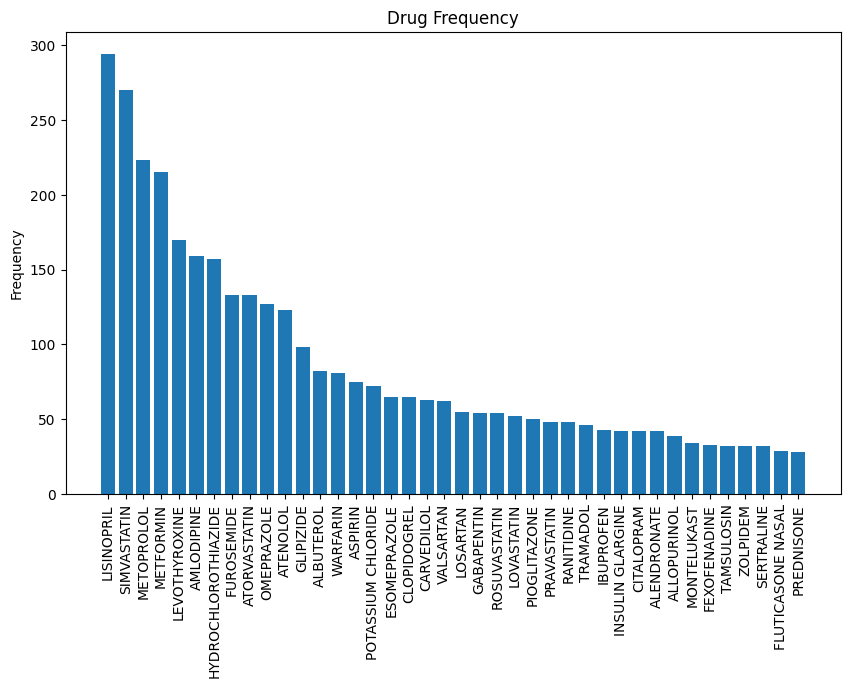

In [32]:
# plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_drug, data['drug_names'].explode().value_counts().values)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Drug Frequency')
plt.show()

# SUGGESTION: with each 100 freq, set a new machine for that drug.
# OTAZKA: prirazovat stroje podle jakeho principu? nahodne - neni dobry napad nejspis.

## Evolutional algo
#### pymoo

In [64]:
LAYOUT = 'rectangle'

In [66]:
def get_layout(type): 
    if type == 'rectangle':
        COORDINATE_X = 4
        COORDINATE_Y = 20
        restricted_area = np.zeros((COORDINATE_X, COORDINATE_Y))
        restricted_area[1:COORDINATE_X-1, 1:COORDINATE_Y-1] = 1
        restricted_area[[0, 0, -1, -1], [0, -1, -1, 0]] = 1

        first_row = [(0, i) for i in range(1,COORDINATE_Y-1)]
        last_column = [(i, COORDINATE_Y-1) for i in range(1,COORDINATE_X-1)]
        last_row = [(COORDINATE_X-1, i) for i in range(1,COORDINATE_Y-1)]
        first_column = [(i, 0) for i in range(1,COORDINATE_X-1)]
        all_posible_positions = first_row + last_column + last_row + first_column
    elif type == 'square':
        COORDINATE_X = 12
        COORDINATE_Y = 12
        restricted_area = np.zeros((COORDINATE_X, COORDINATE_Y))
        restricted_area[1:COORDINATE_X-1, 1:COORDINATE_Y-1] = 1
        restricted_area[[0, 0, -1, -1], [0, -1, -1, 0]] = 1
        # positions as a tape: first row, last column, last row, first column
        first_row = [(0, i) for i in range(1,COORDINATE_Y-1)]
        last_column = [(i, COORDINATE_Y-1) for i in range(1,COORDINATE_X-1)]
        last_row = [(COORDINATE_X-1, i) for i in range(1,COORDINATE_Y-1)]
        first_column = [(i, 0) for i in range(1,COORDINATE_X-1)]
        all_posible_positions = first_row + last_column + last_row + first_column
    elif type == 'kolecko':
        COORDINATE_X = 9
        COORDINATE_Y = 8
        restricted_area = np.zeros((COORDINATE_X, COORDINATE_Y))
        restricted_area[1:COORDINATE_X-1, 1:COORDINATE_Y-1] = 1
        restricted_area[[0, 0, -1, -1], [0, -1, -1, 0]] = 1
        restricted_area[2:COORDINATE_X-2, 2:COORDINATE_Y-2] = 0
        restricted_area[3:COORDINATE_X-3, 3:COORDINATE_Y-3] = 1
        all_posible_positions = [(i, j) for i in range(COORDINATE_X) for j in range(COORDINATE_Y) if restricted_area[i, j] == 0]
    return COORDINATE_X, COORDINATE_Y, restricted_area, all_posible_positions

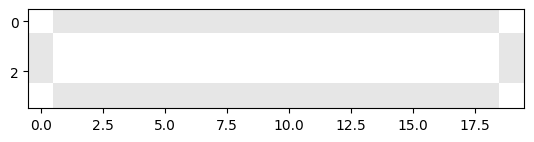

All possible positions: 40


In [67]:
COORDINATE_X, COORDINATE_Y, restricted_area, all_posible_positions = get_layout(LAYOUT)

plt.figure()
plt.imshow(restricted_area, cmap='gray', alpha=0.1)
plt.show()

print('All possible positions:', all_posible_positions.__len__())

In [68]:
# Prepare problem
perm = range(40)
drug_names = data['drug_names'].explode().value_counts().index

positions = all_posible_positions

num_of_positions = len(positions)
distances = np.zeros((num_of_positions, num_of_positions))
for i in range(num_of_positions):
    for j in range(num_of_positions):
        # distances[i, j] = np.sqrt((positions[i][0] - positions[j][0])**2 + (positions[i][1] - positions[j][1])**2)
        distances[i, j] = np.abs(positions[i][0] - positions[j][0]) + np.abs(positions[i][1] - positions[j][1])

# create array of recepts where each drug is index in drug_names
recepts = []
for i in range(len(data)):
    recepts.append([drug_names.to_list().index(drug) for drug in data['drug_names'][i]])

In [69]:
# make np array (for that make the same size recepts (place 0))
max_len = max([len(recept) for recept in recepts])
for i in range(len(recepts)):
    recepts[i] = recepts[i] + [0] * (max_len - len(recepts[i]))
np_recepts = np.array(recepts)

In [53]:
# np_recepts

array([[18, 16,  4, ...,  0,  0,  0],
       [ 5,  2,  9, ...,  0,  0,  0],
       [31,  8,  4, ...,  0,  0,  0],
       ...,
       [ 5, 11, 28, ...,  9, 25,  0],
       [12, 33, 39, ...,  0,  0,  0],
       [12, 30, 28, ...,  0,  0,  0]])

In [70]:
#define the problem
import itertools
from pymoo.core.problem import ElementwiseProblem
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.operators.sampling.rnd import PermutationRandomSampling
from pymoo.operators.crossover.ox import OrderCrossover
from pymoo.operators.mutation.inversion import InversionMutation
from pymoo.termination.default import DefaultSingleObjectiveTermination
from pymoo.termination import get_termination
from pymoo.optimize import minimize


class MyProblem(ElementwiseProblem):
        def __init__(self, permutation, recepts, positions, distances, layout):
            self.permutation = permutation
            self.recepts = recepts
            # self.floor_positions = positions
            self.distances = distances
            self.layout = layout
            super().__init__(n_var=len(permutation), n_obj=1, n_constr=0, xl=0, xu=1)

        def _evaluate(self, x, out, *args, **kwargs):
            sum_of_all_recepts_distances = 0
            # print('next eval')
            for recept in self.recepts:
                if self.layout != 'square' and self.layout != 'rectangle':
                    cur_position_indexes = np.where(np.isin(x, recept[recept != 0]))[0]

                    # Min distance of perm
                    all_perms_of_recept = list(itertools.permutations(cur_position_indexes))
                    distances_of_perms = np.zeros(len(all_perms_of_recept))
                    for ind, perm in enumerate(all_perms_of_recept):
                        dist = sum([self.distances[perm[i], perm[i+1]] for i in range(len(perm) - 1)])
                        distances_of_perms[ind] = dist
                    min_dist = np.min(distances_of_perms)
                else:
                    cur_position_indexes = np.where(np.isin(x, recept[recept != 0]))[0]
                    cur_position_indexes = np.sort(cur_position_indexes)
                    drugs_num = len(cur_position_indexes)
                    all_dist = [self.distances[cur_position_indexes[i], cur_position_indexes[(i+1)%drugs_num]] for i in range(drugs_num)]
                    dists_without_largest = np.sort(all_dist)[:-1] if all_dist.__len__() > 1 else all_dist
                    min_dist = np.sum(dists_without_largest)
                    
                sum_of_all_recepts_distances += min_dist
            out["F"] = sum_of_all_recepts_distances


In [71]:
population_size = 50

init_population = np.zeros((population_size, len(perm)))
for i in range(population_size):
    init_population[i] = np.random.permutation(perm)
init_population[1] = np.array([38, 15, 13 ,30, 11, 22, 32, 27, 37,  3, 24, 25, 18, 39, 19,  8, 35,  0,  9,  2 ,34 ,29,  4 , 1,
 16, 26, 17 , 5 , 7 , 6 ,10 ,36, 28 ,31, 33, 12, 20, 14 ,23, 21])
init_population[0] = np.array([38, 37, 22, 33, 36, 6, 9, 29, 18, 25, 28, 32, 27, 3, 0, 34, 4, 19, 8, 35, 24, 15, 7, 10, 5, 17, 26, 16, 1, 39, 2, 13, 30, 11, 31, 12, 20, 14, 21, 23])

from pymoo.core.callback import Callback
class CallbackWithBsf(Callback):
    def __init__(self) -> None:
        super().__init__()
        self.data["bsf_costs"] = []
        self.data["n_gen"] = []

    def notify(self, algorithm):
        # iteration 
        self.data["n_gen"].append(algorithm.n_gen)
        self.data["bsf_costs"].append(algorithm.pop.get("F"))
        if algorithm.n_gen % 100 == 0:
            print(f"Generation: {algorithm.n_gen} | Best cost: {algorithm.pop.get('F').min()}")

problem = MyProblem(perm, np_recepts, positions, distances, LAYOUT)
algorithm = GA(
    pop_size=population_size, 
    eliminate_duplicates=True, 
    sampling=init_population, 
    crossover=OrderCrossover(), 
    mutation=InversionMutation(), 
    # termination=get_termination("n_gen", 50)
)
# termination = DefaultSingleObjectiveTermination(period=50, n_max_gen=1000)
termination = get_termination("n_eval", 25000)
res = minimize(
    problem,
    algorithm,
    termination,
    save_history=True,
    callback=CallbackWithBsf(),
    # seed=1,
)

Generation: 100 | Best cost: 10317.0
Generation: 200 | Best cost: 9961.0
Generation: 300 | Best cost: 9898.0
Generation: 400 | Best cost: 9878.0
Generation: 500 | Best cost: 9878.0


In [72]:
print('Cost (through all recepts): ', res.F)
print('Permutation: ', res.X)
print('Number of iterations (for population, not candidate): ', res.history.__len__())
# res.algorithm.callback.data['n_gen']

Cost (through all recepts):  [9878.]
Permutation:  [38. 30. 25. 16. 21. 13.  7.  5.  8.  4.  6. 10. 24. 22. 20. 32. 31. 36.
 37.  0. 33. 39. 28. 12. 19. 15. 17.  9.  2.  1.  3. 11. 14. 27. 26. 23.
 29. 35. 18. 34.]
Number of iterations (for population, not candidate):  500


In [73]:
# store results (cost, permutation, layout, population_size, termination)

# npz
np.savez(f'results/{LAYOUT}_{25000}_popsize_50_order_inversion.npz', 
         F=res.F, 
         X=res.X, 
         LAYOUT=LAYOUT, 
         population_size=population_size, 
         n_eval=25000,
         bsf_costs=[i.reshape(-1) for i in res.algorithm.callback.data['bsf_costs']],
         )

In [77]:
# read npz
data_squares = np.load(f'results/square_{10000}_order_inversion.npz')
data_rectangles = np.load(f'results/rectangle_{10000}_order_inversion.npz')
# data_rectangles_pop100 = np.load(f'results/rectangle_{10000}_popsize_100_order_inversion.npz')
data_rectangles_pop100_50k = np.load(f'results/rectangle_{50000}_popsize_100_order_inversion.npz')
data_squares_pop100_50k = np.load(f'results/square_{50000}_popsize_100_order_inversion.npz')
data_squares_pop50_25k = np.load(f'results/square_{25000}_popsize_50_order_inversion.npz')
data_rectangles_pop50_25k = np.load(f'results/rectangle_{25000}_popsize_50_order_inversion.npz')


In [53]:
data_squares_pop100_50k.get('F')

array([12586.])

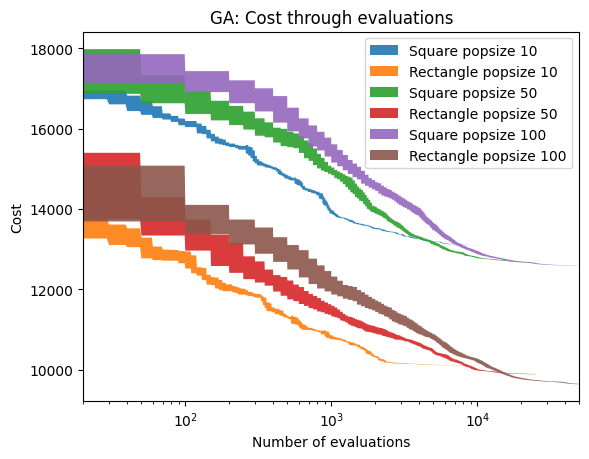

In [75]:
# plot history

fig = plt.figure()
ax = fig.add_subplot()
mean_bsf_costs_square = np.mean(data_squares['bsf_costs'], axis=1)
std_bsf_costs_square = np.std(data_squares['bsf_costs'], axis=1)

mean_bsf_costs_rectangle = np.mean(data_rectangles['bsf_costs'], axis=1)
std_bsf_costs_rectangle = np.std(data_rectangles['bsf_costs'], axis=1)

# mean_bsf_costs_rectangle_pop100 = np.mean(data_rectangles_pop100['bsf_costs'], axis=1)
# std_bsf_costs_rectangle_pop100 = np.std(data_rectangles_pop100['bsf_costs'], axis=1)
mean_bsf_costs_square_pop50_25k = np.mean(data_squares_pop50_25k['bsf_costs'], axis=1)
std_bsf_costs_square_pop50_25k = np.std(data_squares_pop50_25k['bsf_costs'], axis=1)

mean_bsf_costs_rectangle_pop50_25k = np.mean(data_rectangles_pop50_25k['bsf_costs'], axis=1)
std_bsf_costs_rectangle_pop50_25k = np.std(data_rectangles_pop50_25k['bsf_costs'], axis=1)

mean_bsf_costs_rectangle_pop100_50k = np.mean(data_rectangles_pop100_50k['bsf_costs'], axis=1)
std_bsf_costs_rectangle_pop100_50k = np.std(data_rectangles_pop100_50k['bsf_costs'], axis=1)

mean_bsf_costs_square_pop100_50k = np.mean(data_squares_pop100_50k['bsf_costs'], axis=1)
std_bsf_costs_square_pop100_50k = np.std(data_squares_pop100_50k['bsf_costs'], axis=1)


legend = ['Square popsize 10', 'Rectangle popsize 10', 'Square popsize 50', 'Rectangle popsize 50', 'Square popsize 100', 'Rectangle popsize 100']

# ax.plot(mean_bsf_costs)
ax.fill_between(range(10*len(mean_bsf_costs_square)), np.repeat(mean_bsf_costs_square - std_bsf_costs_square, repeats=10), np.repeat(mean_bsf_costs_square + std_bsf_costs_square, repeats=10), alpha=0.9)
ax.fill_between(range(10*len(mean_bsf_costs_rectangle)), np.repeat(mean_bsf_costs_rectangle - std_bsf_costs_rectangle, repeats=10), np.repeat(mean_bsf_costs_rectangle + std_bsf_costs_rectangle, repeats=10), alpha=0.9)

ax.fill_between(range(50*len(mean_bsf_costs_square_pop50_25k)), np.repeat(mean_bsf_costs_square_pop50_25k - std_bsf_costs_square_pop50_25k, repeats=50), np.repeat(mean_bsf_costs_square_pop50_25k + std_bsf_costs_square_pop50_25k, repeats=50), alpha=0.9)
ax.fill_between(range(50*len(mean_bsf_costs_rectangle_pop50_25k)), np.repeat(mean_bsf_costs_rectangle_pop50_25k - std_bsf_costs_rectangle_pop50_25k, repeats=50), np.repeat(mean_bsf_costs_rectangle_pop50_25k + std_bsf_costs_rectangle_pop50_25k, repeats=50), alpha=0.9)

ax.fill_between(range(100*len(mean_bsf_costs_square_pop100_50k)), np.repeat(mean_bsf_costs_square_pop100_50k - std_bsf_costs_square_pop100_50k, repeats=100), np.repeat(mean_bsf_costs_square_pop100_50k + std_bsf_costs_square_pop100_50k, repeats=100), alpha=0.9)
ax.fill_between(range(100*len(mean_bsf_costs_rectangle_pop100_50k)), np.repeat(mean_bsf_costs_rectangle_pop100_50k - std_bsf_costs_rectangle_pop100_50k, repeats=100), np.repeat(mean_bsf_costs_rectangle_pop100_50k + std_bsf_costs_rectangle_pop100_50k, repeats=100), alpha=0.9)

# log scale
plt.xscale('log')
plt.xlim(20, 50000)

plt.xlabel('Number of evaluations')
plt.ylabel('Cost')
plt.legend(legend)
plt.title('GA: Cost through evaluations')
plt.show()

In [79]:
# depict results with drug names on layout
def depict_results_with_drugs(layout, permutation, drug_names):
    COORDINATE_X, COORDINATE_Y, restricted_area, positions = get_layout(layout)
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.imshow(restricted_area, cmap='gray', alpha=0.1)
    ax.set_xticks([])
    ax.set_yticks([])
    for i in range(len(permutation)):
        drug_name = drug_names[int(permutation[i])]
        x = positions[i][0]
        y = positions[i][1]
        if x == 0:
            ha = 'center'
            rotation = 90
            va = 'bottom'
        elif y == COORDINATE_Y-1:
            ha = 'left'
            rotation = 0
            va = 'bottom'
        elif x == COORDINATE_X-1:
            ha = 'right'
            rotation = 90
            va = 'top'
        else:
            ha = 'right'
            rotation = 0
            va = 'center'
        ax.text(y, x, drug_name, ha=ha, va=va, rotation=rotation)
    plt.show()

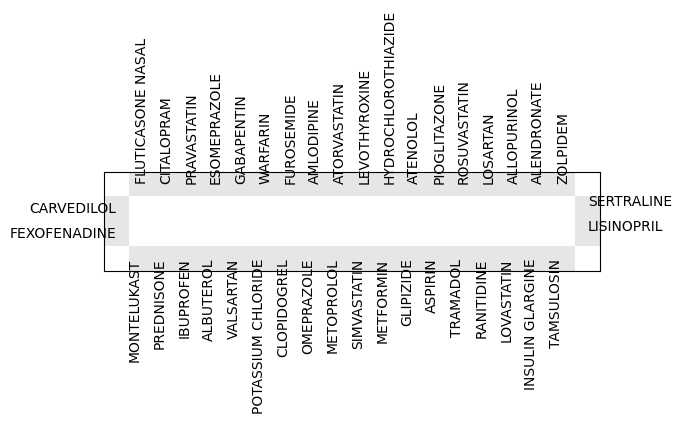

Best cost for square layout: [13098.]
Best cost for rectangle layout: [10099.]


In [82]:
# depict_results_with_drugs(data_rectangles['LAYOUT'], data_rectangles['X'], drug_names)
depict_results_with_drugs(data_rectangles_pop50_25k.get('LAYOUT'), data_rectangles_pop50_25k.get('X'), drug_names)

print('Best cost for square layout:', data_squares['F'])
print('Best cost for rectangle layout:', data_rectangles['F'])

In [67]:
# res.X indexes to drug_names
print('Drug names:', drug_names[res.X])

Drug names: Index(['FLUTICASONE NASAL', 'TAMSULOSIN', 'ROSUVASTATIN', 'IBUPROFEN',
       'FEXOFENADINE', 'ALLOPURINOL', 'POTASSIUM CHLORIDE', 'MONTELUKAST',
       'ALBUTEROL', 'ALENDRONATE', 'ESOMEPRAZOLE', 'SERTRALINE',
       'LEVOTHYROXINE', 'WARFARIN', 'OMEPRAZOLE', 'AMLODIPINE', 'SIMVASTATIN',
       'METOPROLOL', 'FUROSEMIDE', 'CITALOPRAM', 'INSULIN GLARGINE',
       'VALSARTAN', 'PRAVASTATIN', 'CARVEDILOL', 'METFORMIN', 'GLIPIZIDE',
       'ATORVASTATIN', 'PIOGLITAZONE', 'ATENOLOL', 'HYDROCHLOROTHIAZIDE',
       'LISINOPRIL', 'RANITIDINE', 'PREDNISONE', 'ZOLPIDEM', 'TRAMADOL',
       'CLOPIDOGREL', 'GABAPENTIN', 'LOVASTATIN', 'ASPIRIN', 'LOSARTAN'],
      dtype='object')


In [127]:
# init_value compare to res.X

is_same = np.array_equal(init_value, res.X)
print('Is same as initial value:', is_same)
print('Differences: ', np.where(init_value != res.X))
print(init_value, res.X)

Is same as initial value: False
Differences:  (array([ 2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35]),)
[38, 37, 22, 33, 36, 6, 9, 29, 18, 25, 28, 32, 27, 3, 0, 34, 4, 19, 8, 35, 24, 15, 7, 10, 5, 17, 26, 16, 1, 39, 2, 13, 30, 11, 31, 12, 20, 14, 21, 23] [38 37 34 33 22  5 17  2  9  0  3 12 24 35  8 28 32 27 36 13 30 11 31 16
 29 18 25 19  7 39  1  4 15  6 10 26 20 14 21 23]
